# Abrindo Arquivos de Texto
Neste curso de mineração de textos usaremos como material principal de trabalho, os verbetes do Dicionário Histórico e Biográfico do Brasil -- DHBB. Estes verbetes stão disponíveis para Download público.

Neste capítulo vamos aprender a interagir com os verbetes no disco e extrair informações simples a partir dos mesmos.

Vamos começar importando alguma bibliotecas que nos serão úteis nesta tarefa:

In [2]:
import os
import glob

In [3]:
print("alô turma!")

alô turma!


Assumindo que os dados do DHBB já foram baixados para um diretório local, podemos começar inspecionando o diretório e listando o seu conteúdo.

In [4]:
caminho = "F:/dhbb-master/text/*.text"
#caminho = "../../dhbb/text/*.text"
arquivos  = glob.glob(caminho)
len(arquivos)

7687

Temos 7687 verbetes neste diretório. Vamos agora ver como abrir um destes verbetes e inspecionar o seu conteúdo:

In [4]:
arquivos[0]

'F:/dhbb-master/text\\1.text'

Para abrir um arquivo utilizamos um bloco `with`.

In [5]:
with open(arquivos[0],'r', encoding='utf8') as arquivo_aberto:
    verbete = arquivo_aberto.read()
print(verbete)

---
title: COELHO, Machado
natureza: biográfico
sexo: m
cargos:
 - dep. fed. DF 1927-1929 
 - dep. fed. DF 1930
 - const. 1946
 - dep. fed. SP 1946-1951
---

«José Machado Coelho de Castro» nasceu em Lorena (SP).

Estudou no Ginásio Diocesano de São Paulo e bacharelou-se em 1910 pela
Faculdade de Ciências Jurídicas e Sociais. Dedicando-se à advocacia, foi
promotor público em Cunha (SP) e depois delegado de polícia no Rio de
Janeiro, então Distrito Federal.

Iniciou sua vida política como deputado federal pelo Distrito Federal,
exercendo o mandato de 1927 a 1929. Reeleito para a legislatura iniciada
em maio de 1930, ocupava sua cadeira na Câmara quando, em 3 de outubro,
foi deflagrado o movimento revolucionário liderado por Getúlio Vargas.
Ligado ao governo federal, encontrava-se ao lado do presidente
Washington Luís, no palácio Guanabara, no momento de sua deposição no
dia 24 de outubro. Junto com outros companheiros também solidários ao
regime deposto e que se haviam asilado em embaix

Uma outra maneira de abrir um arquivo, seria como se segue, mas teríamos que usar uma linha de código a mais, para fechar o arquivo, que podemos economizar, lendo o arquivo dentro de um bloco `with` como fizemos anteriormente.

In [6]:
arquivo_aberto = open(arquivos[0], 'r', encoding='utf8')
verbete = arquivo_aberto.read()
arquivo_aberto.close()

A variável **verbete** que criamos na célula anterior é uma variável do tipo `string`, que é a otipo usado pelo Python para representar um bloco de texto. Podemos manipular o texto dentro de uma `string` de diversas maneiras:

In [7]:
type(verbete)

str

In [8]:
print(verbete.split('---')[1])


title: COELHO, Machado
natureza: biográfico
sexo: m
cargos:
 - dep. fed. DF 1927-1929 
 - dep. fed. DF 1930
 - const. 1946
 - dep. fed. SP 1946-1951



Tipos de dados em Python, também conhecidos como  objetos, possuem métodos. O método `split` do tipo `string` segmenta uma string nas posicões em que ocorram uma sequência específica de caracteres, retornando um outro tipo de dado, denominado `lista`.

In [9]:
type(verbete.split('---'))

list

Listas são sequências de objetos de quaisquer tipos que também apresentam seu conjunto de métodos. Para descobrir os métodos de qualquer objeto, basta colocar um ponto após o nome da variável e pressionar a tecla `<tab>`. Listas são delimitadas por colchetes: `[]` (lista vazia). Abaixo vamos dividir o verbete em uma lista de `strings`.

In [10]:
l = verbete.split('---')
l

['',
 '\ntitle: COELHO, Machado\nnatureza: biográfico\nsexo: m\ncargos:\n - dep. fed. DF 1927-1929 \n - dep. fed. DF 1930\n - const. 1946\n - dep. fed. SP 1946-1951\n',
 '\n\n«José Machado Coelho de Castro» nasceu em Lorena (SP).\n\nEstudou no Ginásio Diocesano de São Paulo e bacharelou-se em 1910 pela\nFaculdade de Ciências Jurídicas e Sociais. Dedicando-se à advocacia, foi\npromotor público em Cunha (SP) e depois delegado de polícia no Rio de\nJaneiro, então Distrito Federal.\n\nIniciou sua vida política como deputado federal pelo Distrito Federal,\nexercendo o mandato de 1927 a 1929. Reeleito para a legislatura iniciada\nem maio de 1930, ocupava sua cadeira na Câmara quando, em 3 de outubro,\nfoi deflagrado o movimento revolucionário liderado por Getúlio Vargas.\nLigado ao governo federal, encontrava-se ao lado do presidente\nWashington Luís, no palácio Guanabara, no momento de sua deposição no\ndia 24 de outubro. Junto com outros companheiros também solidários ao\nregime deposto e 

Note que nas strings acima existem várias ocorrências da sequencia de caracteres `'\n'`. Esta sequência identifica quebra de linhas. Podemos então utilizá-la para dividir o cabeçalho do verbete em uma lista de linhas:

In [11]:
cabeçalho = verbete.split('---')[1]
cabeçalho.splitlines()

['',
 'title: COELHO, Machado',
 'natureza: biográfico',
 'sexo: m',
 'cargos:',
 ' - dep. fed. DF 1927-1929 ',
 ' - dep. fed. DF 1930',
 ' - const. 1946',
 ' - dep. fed. SP 1946-1951']

Elementos de uma lista podem ser acessado por sua posição na sequência, por exemplo para acessar a 3ª string da lista:

In [12]:
print(l[2])



«José Machado Coelho de Castro» nasceu em Lorena (SP).

Estudou no Ginásio Diocesano de São Paulo e bacharelou-se em 1910 pela
Faculdade de Ciências Jurídicas e Sociais. Dedicando-se à advocacia, foi
promotor público em Cunha (SP) e depois delegado de polícia no Rio de
Janeiro, então Distrito Federal.

Iniciou sua vida política como deputado federal pelo Distrito Federal,
exercendo o mandato de 1927 a 1929. Reeleito para a legislatura iniciada
em maio de 1930, ocupava sua cadeira na Câmara quando, em 3 de outubro,
foi deflagrado o movimento revolucionário liderado por Getúlio Vargas.
Ligado ao governo federal, encontrava-se ao lado do presidente
Washington Luís, no palácio Guanabara, no momento de sua deposição no
dia 24 de outubro. Junto com outros companheiros também solidários ao
regime deposto e que se haviam asilado em embaixadas e legações, foi
enviado em novembro para o estrangeiro. Em outubro de 1932, estava
presente no porto de Alcântara, em Lisboa, para receber os
revolucio

Muitas vezes, as atrings podem vir acompanhadas de um ou mais espaços no ínicio ou no fim. Para removê-los podemos usar o método `strip` como exemplificado abaixo. Caso queiramos remover apenas os espaços no início ou no fim, podemos usar `lstrip` ou `rstrip`, respectivamente.

In [15]:
"   gjsldfkgj    ".strip()

'gjsldfkgj'

Um outro tipo de estrutura de dados fundamental no Python, é chamado um dicionário, e é denotado por um conjunto de pares de (chave: valor). Abaixo vamos construir um dicionário com os campos de um verbete.

In [16]:
campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n') if l and ':' in l}
campos

{'title': 'COELHO, Machado',
 'natureza': 'biográfico',
 'sexo': 'm',
 'cargos': ''}

No exemplo acima usamos um laço `for` para percorrer repetidamente o campos do cabeçalho e inseri-los um-a-um no dicionário, em apenas uma linha de código. esta maneira de prencher o dicionário é chamada de *"dict comprehension"*. Para entendermos melhor como funciona um laço for, e exatament a sequencia de operações realizada acima, vamos escrever "por extenso" o código acima.

In [17]:
campos = {}
for linha in cabeçalho.split('\n'):
    if linha and ':' in linha:
        chave, valor = linha.split(':')
        campos[chave.strip()] = valor.strip()

campos

{'title': 'COELHO, Machado',
 'natureza': 'biográfico',
 'sexo': 'm',
 'cargos': ''}

## Exercício
Construa para 5 verbetes, um dicionário com o seguinte conteúdo: `{"nome-do-cargo":"período"}` para todos os cargos de cada verbetado.

In [47]:
def pega_cabeçalho(caminho, natureza):
    with open(caminho, 'r', encoding='utf8') as verb:
        cabeçalho = verb.read().split('---')[1]
    if natureza in cabeçalho:
        return cabeçalho
    else:
        return

respostas = []
for verbete in arquivos[10:18]:
    resposta = {}
    cabeçalho = pega_cabeçalho(verbete, 'biográfico')

    if cabeçalho is None:
        continue

    cargos = cabeçalho.split('cargos:')[1]
    lista_de_cargos = [cargo.strip('- ') for cargo in cargos.splitlines() if cargo.strip('- ') != ""]
    for cargo in lista_de_cargos:
        partes = cargo.split()
        if len(partes) > 1:
            per = partes[-1]
            nome = ' '.join(partes[:-1])
        else:
            nome = partes[0]
            per = "NA"
        resposta[nome] = per
    respostas.append(resposta)
#     print(cargos)
    print(resposta)
print(sum([1 for r in respostas if 'autor:' in r]))

{'const.': '1987-1988', 'dep. fed. DF': '1987-1991'}
{'militar': 'NA', 'gov. RR': '1967-1974', 'dep. fed. RR': '1975-1983', 'sen. RR': '1991'}
{'gov. MT': '1991-1995'}
{'militar': 'NA', 'rev.': '1930', 'interv. BA': '1942-1945', 'const.': '1946', 'sen. BA': '1946-1955', 'autor:': 'NA', 'Amélia': 'Coutinho'}
{'gov. MT': '1991-1995', 'sen. MT': '2007'}
{'gov. PR': '1986-1987', 'autor:': 'NA', 'Giana': 'Castro'}
{'dep. fed. TO': '1989-1992', 'sen. TO': '1999'}
{'dep. fed. MT': '2011', 'gov. MT': '1983-1986', 'const.': '1987-1988', 'sen. MT': '1991-1999', 'autor:': 'NA', 'Christiane': 'Jalles', 'Maria Letícia': 'Correia'}
3


Na célula acima contruímos uma variável de tipo *Dicionário*, que é basicamente um conjunto de pares, delimitado por `{}`. Estes pares são chamados pares `chave: valor`, como dissemos anteriormente

## Exercício:
Modifique o código acima para criar outro dicionário com a seguinte estrutura:
```
{
    "nome": ["nome do verbetado", "nome do verbetado", ...],
    "cargo":[cargo 1, cargo2, ...],
    "início": [1987,1987, ...],
    "fim": [1988, 1991, ...]
}
```

In [58]:
resposta = {"nome": [], "cargo":[], "sexo":[], "inicio":[], "fim":[]}
for verbete in arquivos[10:18]:
    cabeçalho = pega_cabeçalho(verbete, 'biográfico')
    cabeçalho = cabeçalho.split('autor:')[0]
    if cabeçalho is None:
        continue
    linhas = cabeçalho.splitlines()
    cargos = cabeçalho.split('cargos:')[1]
    lista_de_cargos = [cargo.strip('- ') for cargo in cargos.splitlines() if cargo.strip('- ') != ""]
    for cargo in lista_de_cargos:
        resposta['nome'].append([linha.split(':')[1] for linha in linhas if linha.startswith('title:')][0])
        resposta['sexo'].append([linha.split(':')[1] for linha in linhas if linha.startswith('sexo:')][0])
        partes = cargo.split()
        if len(partes) > 1:
            per = partes[-1]
            nome = ' '.join(partes[:-1])
            anos = per.split('-')
            resposta['inicio'].append(int(per.split('-')[0]))
            if len(anos)>1:
                resposta['fim'].append(int(per.split('-')[1]))
            else:
                resposta['fim'].append("NA")
        else:
            nome = partes[0]
            resposta['inicio'].append("NA")
            resposta['fim'].append("NA")
        resposta['cargo'].append(nome)
        

#     print(cargos)
    print(resposta)
#print(sum([1 for r in resposta if 'autor:' in r]))

{'nome': [' CAMPOS, Geraldo', ' CAMPOS, Geraldo'], 'cargo': ['const.', 'dep. fed. DF'], 'sexo': [' m', ' m'], 'inicio': [1987, 1987], 'fim': [1988, 1991]}
{'nome': [' CAMPOS, Geraldo', ' CAMPOS, Geraldo', ' CAMPOS, Hélio', ' CAMPOS, Hélio', ' CAMPOS, Hélio', ' CAMPOS, Hélio'], 'cargo': ['const.', 'dep. fed. DF', 'militar', 'gov. RR', 'dep. fed. RR', 'sen. RR'], 'sexo': [' m', ' m', ' m', ' m', ' m', ' m'], 'inicio': [1987, 1987, 'NA', 1967, 1975, 1991], 'fim': [1988, 1991, 'NA', 1974, 1983, 'NA']}
{'nome': [' CAMPOS, Geraldo', ' CAMPOS, Geraldo', ' CAMPOS, Hélio', ' CAMPOS, Hélio', ' CAMPOS, Hélio', ' CAMPOS, Hélio', ' CAMPOS, Jaime'], 'cargo': ['const.', 'dep. fed. DF', 'militar', 'gov. RR', 'dep. fed. RR', 'sen. RR', 'gov. MT'], 'sexo': [' m', ' m', ' m', ' m', ' m', ' m', ' m'], 'inicio': [1987, 1987, 'NA', 1967, 1975, 1991, 1991], 'fim': [1988, 1991, 'NA', 1974, 1983, 'NA', 1995]}
{'nome': [' CAMPOS, Geraldo', ' CAMPOS, Geraldo', ' CAMPOS, Hélio', ' CAMPOS, Hélio', ' CAMPOS, Hélio'

In [49]:
print(pega_cabeçalho(arquivos[3], 'biográfico'))


title: CAMPOS, Eduardo
natureza: biográfico
sexo: m
cargos: 
 - dep. fed. PE 1995
 - dep. fed. PE 1998-2003
 - min. Ciênc. e Tecnol. 2003-2005
 - gov. PE 2007-2014
autor: 
 - Adrianna Setemy 
 - Luciana Pinheiro



## Abrindo um grande número de documentos texto
Como vimos acima existem 7687 verbetes à nossa disposição no disco, mas não podemos abrir todos ao mesmo tempo pois, em primeiro lugar podem não caber na memória, em segundo lugar raramente precisaremos inpecioná-los todos ao mesmo tempo. O mais comum é analisá-los em sequência. Vamos inspecionar os primeiros 10:

In [13]:
for a in arquivos[:10]:
    with open (a, 'r') as f:
        verbete = f.readlines()
    print('Verbete: ', a.split('.text')[0].split('/')[-1])
    print(verbete[1])

Verbete:  1956
title: FERRAZ, Gabriel Lopes

Verbete:  10978
title: DESCONSI, Orlando 

Verbete:  2687
title: LACERDA, Jorge

Verbete:  3429
title: MELO, Geraldo Medeiros de

Verbete:  2839
title: LIMA, Alceu Amoroso

Verbete:  2088
title: FONTES, Tomás

Verbete:  11055
title: FROSSARD, Denise

Verbete:  11650
title: MURAD, Jamil

Verbete:  12159
title: SÁ, Liliam

Verbete:  4940
title: SEIXAS, Luís Siqueira



In [14]:
arquivos[1]

'../dhbb/text/10978.text'

Acima utilizamos uma estrutura de repetição, denominada "laço for" para abrir sequencialmente os arquivos. É importante notar que a cada volta do laço, o arquivo texo é atribuído à mesma variável, o que significa que nunca há mais do que apenas um verbete na memória. Desta forma poderíamos potencialmente analisar todos os milhares de verbetes ocupando apenas uma quantidade pequena e constante de memória. Outro detalhe do código acima é que, para facilitar a extração do título do verbete, Fizemos a leitura do arquivo com o método `readlines` que retorna o verbete já divido em uma lista de linhas ao invés de uma `string`.

## Outros recursos do DHBB
O arquivo do DHBB disponível no Github oferece outros recursos textuais para nos auxiliar em nossa pesquisa, como por exemplos dicionários com identificadores de "Entidades" presentes nos verbetes, como pessoas, organizações, eventos, etc.

In [60]:
with  open("F:/dhbb-master/dic/pessoa-individuo.txt", 'r', encoding='utf8') as f:
    pessoas = f.readlines()
pessoas[:10]

['Aarão Rebelo\n',
 'Aarão Steinbruch\n',
 'Abalcazar Garcia\n',
 'Abdias Do Nascimento\n',
 'Abdon Goncalves Nanhay\n',
 'Abdon Gonçalves\n',
 'Abdon Sena\n',
 'Abdon de Mello\n',
 'Abdur R. Khan\n',
 'Abel Avila dos Santos\n']

In [63]:
with  open("F:/dhbb-master/dic/pessoa-papel.txt", 'r', encoding='utf8') as f:
    profissão = f.readlines()
profissão[:10]

['Advogado\n',
 'Advogado Geral da União\n',
 'Agente de investimento\n',
 'Agente de segurança judiciária\n',
 'Alfaiate\n',
 'Analista administrativo\n',
 'Analista de comércio exterior\n',
 'Antiquário\n',
 'Arcebispo\n',
 'Armador\n']

In [64]:
with  open("F:/dhbb-master/dic/evento.txt", 'r', encoding='utf8') as f:
    evento = f.readlines()
evento[:10]

['A Rusga\n',
 'ATENTADO DA TONELEIROS\n',
 'ATENTADO DO RIOCENTRO\n',
 'Aclamação de Amador Bueno\n',
 'Balaiada\n',
 'Batalha da Maria Antônia\n',
 'Batalha da Venda Grande\n',
 'Batalha das Toninhas\n',
 'Batalha de Santa Luzia\n',
 'COMÍCIO DAS REFORMAS\n']

In [65]:
with  open("F:/dhbb-master//dic/organizacao.txt", 'r', encoding='utf8') as f:
    organização = f.readlines()
organização[:10]

['Abrigo Lar dos Velhos Vicentini\n',
 'Academia Alagoana de Letras\n',
 'Academia Brasileira de Ciências\n',
 'Academia Brasileira de Ciências Econômicas e Administrativas\n',
 'Academia Brasileira de Ciências Sociais e Políticas\n',
 'Academia Brasileira de Direito Empresarial\n',
 'Academia Brasileira de Letras\n',
 'Academia Brasileira de Música\n',
 'Academia Brasiliense de Letras\n',
 'Academia Cultural de Curitiba\n']

In [66]:
with  open("F:/dhbb-master/dic/formulacao-politica.txt", 'r', encoding='utf8') as f:
    politica = f.readlines()
politica[:10]

['anteprojeto Constitucional\n',
 'anteprojeto da Carta Magna\n',
 'anteprojeto da Comissão Provisória\n',
 'anteprojeto da Comissão Provisória de Estudos Constitucionais\n',
 'anteprojeto da Comissão de Sistematização\n',
 'anteprojeto da Consolidação das Leis do Trabalho\n',
 'anteprojeto da Constituição\n',
 'anteprojeto da Lei Orgânica da Magistratura\n',
 'anteprojeto da Lei de Acidentes no Trabalho\n',
 'anteprojeto da Lei de Direitos Autorais\n']

# Extraindo Informação Estruturada
Agora que sabemos como abrir arquivos de texto e ler o seu conteúdo, podemos experimentar a extração de imformações específicas dos verbetes e organizá-la em uma tabela. Para isso vamos lançar mão de uma biblioteca chamada **Pandas** para organizar em uma estrutura tabular, chamada `DataFrame` os dados que vamos extrair.

In [8]:
import pandas as pd
pd.set_option("display.latex.repr", True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Nós vimos acima que os verbetes contém uma seção inicial delimitada pelos caracteres `---` vamos utilizar esta característica do texto para guiar nossa extração de informação. Como você pode perceber, já começamos a reutilizar código que escrevemos anteriormente. Para facilitar o reuso e reduzir a necessidade de escrever múltiplas vezes o mesmo código vamos aprender a organizá-lo melhor. Vamos começar definindo uma função.

In [5]:
def tabula_verbete(n=None):
    """
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular
    """
    if n is None:
        n = len(arquivos)
    linhas = []
    for a in arquivos[:n]:
        with open (a, 'r', encoding='utf8') as f:
            verbete = f.read()
        cabeçalho = verbete.split('---')[1]
        campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n')[:4] if l}
        campos['arquivo'] = os.path.split(a)[1]
        campos['cargos'] = 'NA' if 'cargos:' not in cabeçalho else cabeçalho.split('cargos:')[1]
        campos['corpo'] = verbete.split('---')[2]
        linhas.append(campos)
    tabela = pd.DataFrame(data = linhas, columns=['arquivo','title', 'natureza', 'sexo', 'cargos', 'corpo'])
    return tabela

A função acima inclui a maior parte do código que escrevemos anteriormente, só que encapsulado em uma função que nos permite executar a extração e tabulação do cabeçalho para o numero de verbetes que desejarmos. Podemos ver abaixo que na verdade é muito rápido processar todos os verbetes.

In [6]:
help(tabula_verbete)

Help on function tabula_verbete in module __main__:

tabula_verbete(n=None)
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular



In [9]:
tab = tabula_verbete()

In [10]:
tab.head()

,arquivo,title,natureza,sexo,cargos,corpo
0,1.text,"COELHO, Machado",biográfico,m,\n - dep. fed. DF 1927-1929 \n - dep. fed. DF ...,\n\n«José Machado Coelho de Castro» nasceu em ...
1,10.text,"ABÍLIO, Armando",biográfico,m,\n - dep. fed. PB 1995-1999\n - dep. fed. PB ...,\n\n«Armando Abílio Vieira» nasceu em Itaporan...
2,100.text,"ALEIXO, Pedro",biográfico,m,\n - const. 1934\n - dep. fed. MG 1935-1937\n ...,"\n\n«Pedro Aleixo» nasceu em São Caetano, dist..."
3,1000.text,"CAMPOS, Eduardo",biográfico,m,\n - dep. fed. PE 1995\n - dep. fed. PE 1998-...,\n\n«Eduardo Henrique Accioly Campos» nasceu e...
4,1001.text,"CAMPOS, Eleazar Soares",biográfico,m,\n - magistrado\n - interv. MA 1945-1946\n,\n\n«Eleazar Soares Campos» nasceu em São Luís...


Podemos visualizar uma descrição básica da tabela resultante

In [17]:
tab.describe()

,arquivo,title,natureza,sexo,cargos,corpo
count,7687,7687,7687,6722,6724,7687
unique,7687,7596,2,2,6066,7685
top,11375.text,"HENRIQUE, João",biográfico,m,\n - const. 1934 \n,\n\n«Antônio de Freitas Cavalcanti» nasceu em ...
freq,1,3,6724,6517,23,2


Por exemplo fica fácil ver que no DHBB predominam biografias de personagens do sexo masculino.

In [18]:
print(tab.sexo.value_counts())

m    6517
f     205
Name: sexo, dtype: int64


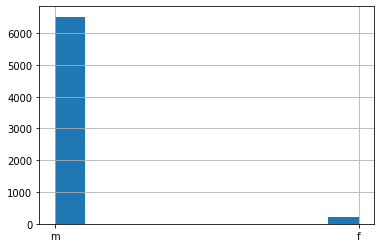

In [21]:
tab.sexo.hist();

Percebemos também que a natureza predominante dos verbetes é biográfica e que só existem duas naturezas, mas qua a outra?

In [22]:
print(tab.natureza.value_counts())

biográfico    6724
temático       963
Name: natureza, dtype: int64


In [96]:
tab2 = pd.DataFrame(resposta)
tab2.inicio = tab2.inicio.replace('NA', pd.np.nan)
tab2.fim = tab2.fim.replace('NA', pd.np.nan)
tab2

,nome,cargo,sexo,inicio,fim
0,"CAMPOS, Geraldo",const.,m,1987.0,1988.0
1,"CAMPOS, Geraldo",dep. fed. DF,m,1987.0,1991.0
2,"CAMPOS, Hélio",militar,m,NaN,NaN
3,"CAMPOS, Hélio",gov. RR,m,1967.0,1974.0
4,"CAMPOS, Hélio",dep. fed. RR,m,1975.0,1983.0
5,"CAMPOS, Hélio",sen. RR,m,1991.0,NaN
6,"CAMPOS, Jaime",gov. MT,m,1991.0,1995.0
7,"ALEIXO, Pinto",militar,m,NaN,NaN
8,"ALEIXO, Pinto",rev.,m,1922.0,NaN
9,"ALEIXO, Pinto",rev.,m,1930.0,NaN


In [92]:
tab2.dropna()

,nome,cargo,sexo,inicio,fim
0,"CAMPOS, Geraldo",const.,m,1987.0,1988.0
1,"CAMPOS, Geraldo",dep. fed. DF,m,1987.0,1991.0
3,"CAMPOS, Hélio",gov. RR,m,1967.0,1974.0
4,"CAMPOS, Hélio",dep. fed. RR,m,1975.0,1983.0
6,"CAMPOS, Jaime",gov. MT,m,1991.0,1995.0
10,"ALEIXO, Pinto",interv. BA,m,1942.0,1945.0
12,"ALEIXO, Pinto",sen. BA,m,1946.0,1955.0
13,"CAMPOS, Jaime",gov. MT,m,1991.0,1995.0
15,"CAMPOS, João Elísio Ferraz de",gov. PR,m,1986.0,1987.0
16,"CAMPOS, José Eduardo Siqueira",dep. fed. TO,m,1989.0,1992.0


# Exportando para Bancos de Dados
Depois de realizarmos a nossa análise e tabular os resultados, podemos exportar a tabela em vários formatos. Em primeiro lugar, caso queiramos abri nossa trabalho em uma planilha, devemos salvar no formato CSV, ou "comma-separated-values". Este formato pode ser aberto imediatamente em uma planilha.

In [97]:
tab.to_csv("minha_tabela.csv", sep='|')

Acima usamos o caracter "|" como separador para evitar confusões com as virgulas existentes no texto.
## Exportando para um banco de dados relacional
Para exportar para um banco relacional, precisamos de uma biblioteca adicional, o [SQLAlchemy](https://www.sqlalchemy.org/). Estabiblioteca nos permite interagir com a maioria dos banco relacionais. Aqui vamos usar o banco [SQLite](https://www.sqlite.org/index.html).

In [11]:
from sqlalchemy import create_engine

In [12]:
engine = create_engine('sqlite:///minha_tabela.sqlite', echo=False)
tab.to_sql('resultados', con=engine, if_exists='replace')

Uma vez inserido no banco relacional, podemos fazer consultas aos dados usando a linguagem SQL. Abaixo obtemos o resultado da consulta em uma lista.

In [34]:
engine.execute("select title from resultados where natureza='temático'").fetchall()[:10]

[('Destacamento de Operações e Informações – Centro de Operações e Defesa Interna (DOI-CODI)',),
 ('Agência Brasileira de Inteligência (Abin)',),
 ('Associação Brasileira de Emissoras de Rádio e Televisão (ABERT)',),
 ('Associação Nacional de Jornais (ANJ)',),
 ('Associação Nacional dos Membros do Ministério Público (CONAMP)',),
 ('CAROS AMIGOS',),
 ('CARTA CAPITAL',),
 ('Central dos Trabalhadores e das Trabalhadoras do Brasil (CTB)',),
 ('Central Geral dos Trabalhadores do Brasil (CGTB)',),
 ('Conselho de Comunicação Social (CCS)',)]

Se quisermos os resultado na forma de um `Dataframe`, podemos usar o **Pandas**.

In [35]:
pd.read_sql_query("select * from resultados where natureza='temático'", con=engine).head()

,index,arquivo,title,natureza,sexo,cargos,corpo
0,354,10989.text,Destacamento de Operações e Informações – Cent...,temático,None,NA,\n\n«DESTACAMENTO DE OPERAÇÕES E INFORMAÇÕES –...
1,1027,11595.text,Agência Brasileira de Inteligência (Abin),temático,None,NA,\n\n«AGÊNCIA BRASILEIRA DE INTELIGÊNCIA (Abin)...
2,1028,11596.text,Associação Brasileira de Emissoras de Rádio e ...,temático,None,NA,\n\n«ASSOCIAÇÃO BRASILEIRA DE EMISSORAS DE RÁD...
3,1029,11597.text,Associação Nacional de Jornais (ANJ),temático,None,NA,\n\n«ASSOCIAÇÃO NACIONAL DE JORNAIS (ANJ)»\n\n...
4,1030,11598.text,Associação Nacional dos Membros do Ministério ...,temático,None,NA,\n\n«ASSOCIAÇÃO NACIONAL DOS MEMBROS DO MINIST...


# Exercícios

1. Construa uma função para buscar apenas verbetes de personagens que tenham ocupado o cargo de deputado federal. Tabule os resultados incluindo o número de mandatos.
1. Construa uma função para buscar o primeiro verbete temático e apresente o seu conteúdo.
1. Encontre todos os verbetes que contenham "Academia Brasileira de Letras". Que porcentagem destes correspondem a membros da dita academia?
1. Construa uma linha do tempo que represente a cobertura histórica do DHBB.

In [109]:
tab2.groupby('nome').count()

,cargo,sexo,inicio,fim
nome,,,,
"ALEIXO, Pinto",6,6,5,2
"CAMPOS, Geraldo",2,2,2,2
"CAMPOS, Hélio",4,4,3,2
"CAMPOS, Jaime",3,3,3,2
"CAMPOS, José Eduardo Siqueira",2,2,2,1
"CAMPOS, João Elísio Ferraz de",1,1,1,1
"CAMPOS, Júlio",6,6,6,5


In [111]:
tab2

,nome,cargo,sexo,inicio,fim
0,"CAMPOS, Geraldo",const.,m,1987.0,1988.0
1,"CAMPOS, Geraldo",dep. fed. DF,m,1987.0,1991.0
2,"CAMPOS, Hélio",militar,m,NaN,NaN
3,"CAMPOS, Hélio",gov. RR,m,1967.0,1974.0
4,"CAMPOS, Hélio",dep. fed. RR,m,1975.0,1983.0
5,"CAMPOS, Hélio",sen. RR,m,1991.0,NaN
6,"CAMPOS, Jaime",gov. MT,m,1991.0,1995.0
7,"ALEIXO, Pinto",militar,m,NaN,NaN
8,"ALEIXO, Pinto",rev.,m,1922.0,NaN
9,"ALEIXO, Pinto",rev.,m,1930.0,NaN
